In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.boston_housing.load_data()

# Normalization
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

Y_train = tf.expand_dims(Y_train, axis=1)
Y_test = tf.expand_dims(Y_test, axis=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train[0])

# dim_target = 12

# # X_train_1D = X_train[:, dim_target] # tf.matmul할때 matrix로 인식을 못해서 에러남
# X_train_1D = tf.expand_dims(X_train[:, dim_target], axis=1)
# X_test_1D = tf.expand_dims(X_test[:, dim_target], axis=1)

# print(X_train_1D.shape)
# print(X_test_1D.shape)
# print(Y_train_1D.shape)
# print(Y_test_1D.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [11]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title:
        plt.title(str_title, fontsize=20, pad=20)
    
    plt.plot(X, Y, ls='none', marker='o')
    
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
    
    plt.ylabel("house value")
    plt.xlabel("LSTAT")
    plt.tick_params(axis='both', labelsize=14)

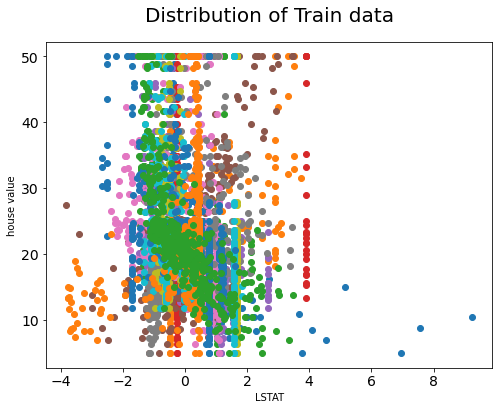

In [12]:
plot_graph(X_train, Y_train, str_title=f"Distribution of Train data")

In [13]:
Xmat_T_Xmat = tf.matmul(tf.transpose(X_train), X_train) # X^t * X
weight = tf.matmul(
            tf.matmul(tf.linalg.inv(Xmat_T_Xmat),
                      tf.transpose(X_train)),
            Y_train)

print(weight.shape)
print(weight)

(13, 1)
tf.Tensor(
[[-1.10749194]
 [ 1.35308963]
 [ 0.02710126]
 [ 0.9943535 ]
 [-2.40156557]
 [ 2.3962877 ]
 [ 0.2111952 ]
 [-3.47121628]
 [ 2.90814885]
 [-1.95741889]
 [-1.98298545]
 [ 0.81955092]
 [-4.02739073]], shape=(13, 1), dtype=float64)


In [14]:
loss = tf.math.sqrt(tf.reduce_mean((Y_test - tf.squeeze(tf.matmul(X_test, weight)))**2)).numpy()
print(loss)

25.281919432356975


In [16]:
X_train_for_line = np.expand_dims(np.linspace(np.min(X_train), np.max(X_train)),axis=1)
X_test_for_line = np.expand_dims(np.linspace(np.min(X_test), np.max(X_test)),axis=1)

plot_graph(X_train, Y_train,
          X_hat = X_train_for_line,
          Y_hat = tf.matmul(X_train_for_line,weight),
          str_title = 'Linear Regression for training data')
plot_graph(X_test, Y_test,
          X_hat = X_test_for_line,
          Y_hat = tf.matmul(X_test_for_line,weight),
          str_title = 'Linear Regression for test data')

InvalidArgumentError: Matrix size-incompatible: In[0]: [50,1], In[1]: [13,1] [Op:MatMul]

In [15]:
#주어진 X값을 가지고 Phi를 만드는 함수 정의
def feature_f(X, degree):
    num_X = tf.shape(X)[0]
#     Phi = tf.ones([num_X, 1]) #왼쪽처럼 정의하면 이후 weight_f 구하는 matmul 과정에서 data type 달라서 에러 발생. 따라서 아래처럼 입력해줘야 함. (에러메세지 확인해볼것)
    Phi = tf.ones([num_X, 1],dtype=tf.dtypes.float64) #degree=0일 때 Phi
    
    for i in range (0,degree):
        #degree가 1씩 증가할 때마다 [[x_1^(degree)], [x_2^(degree)], ... , [x_N^(degree)]] 형태의 column이 이전 매트릭스에 추가된다고 볼 수 있다.
        #따라서, degree-1일때의 Phi(즉, feature_f(X, degree-1)에 [[x_1^(degree)], [x_2^(degree)], ... , [x_N^(degree)]]를 "concat"함수를 통해 붙여준다.
        Phi = Phi * X 
        if i == degree-1:
            Phi = tf.concat([feature_f(X, degree-1),Phi],axis=1)
            
    return Phi

In [16]:
num_degree = 3

Phi_train = feature_f(X_train_1D, num_degree)
Phi_test = feature_f(X_test_1D, num_degree)
Phi_Xtrain_for_line = feature_f(X_train_for_line, num_degree)
Phi_Xtest_for_line = feature_f(X_test_for_line, num_degree)

Phi_T_Phi = tf.matmul(tf.transpose(Phi_train),Phi_train)
weight_f = tf.matmul(
                tf.matmul(
                    tf.linalg.inv(Phi_T_Phi),
                    tf.transpose(Phi_train)
                ),
                tf.expand_dims(Y_train,axis=1)
)

loss = tf.math.sqrt(tf.reduce_mean((Y_test-tf.squeeze(tf.matmul(Phi_test,weight_f)))**2)).numpy()
print(loss)

5.68388844400261


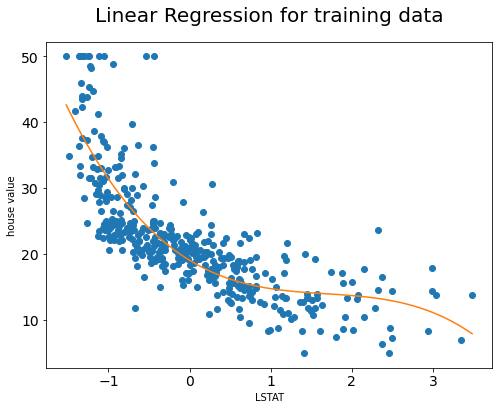

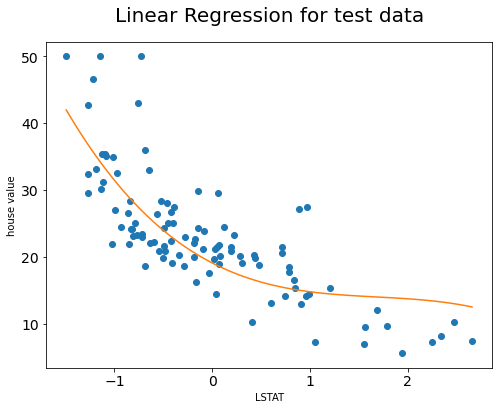

In [22]:
plot_graph(X_train_1D, Y_train,
          X_hat = X_train_for_line,
          Y_hat = tf.matmul(Phi_Xtrain_for_line,weight_f),
          str_title = 'Linear Regression for training data')
plot_graph(X_test_1D, Y_test,
          X_hat = X_test_for_line,
          Y_hat = tf.matmul(Phi_Xtest_for_line,weight_f),
          str_title = 'Linear Regression for test data')

In [23]:
(H, w) = weight_f.shape
weight_gd = tf.Variable(np.random.randn(H, w), dtype=tf.dtypes.float64) # tf.constant

def RMSE(y_pred, y_true):
    return tf.math.sqrt(tf.reduce_mean(tf.square(tf.squeeze(y_pred) - y_true)))

In [25]:
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

def run_optimization():
    with tf.GradientTape() as g:
        pred = tf.matmul(Phi_train, weight_gd)
        loss = RMSE(pred, Y_train)
        
    gradients = g.gradient(loss, [weight_gd])
    optimizer.apply_gradients(zip(gradients, [weight_gd]))

In [26]:
training_steps = 30000
display_step = 5000

for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = tf.matmul(Phi_train, weight_gd)
        loss = RMSE(pred, Y_train)
        print(f"step: {step}, loss: {loss.numpy()}, weight: {weight_gd.numpy()}")

step: 5000, loss: 19.382488618263178, weight: [[ 2.82998607]
 [-0.26535822]
 [ 2.77835575]
 [-0.67158544]]
step: 10000, loss: 12.81082486822732, weight: [[ 7.21166014]
 [-1.9364865 ]
 [ 5.90181496]
 [-1.70507448]]
step: 15000, loss: 8.395685176812579, weight: [[11.02644472]
 [-3.4134717 ]
 [ 8.04341318]
 [-2.40386938]]
step: 20000, loss: 6.755355330739937, weight: [[13.55120837]
 [-4.43502302]
 [ 8.64465405]
 [-2.57996558]]
step: 25000, loss: 6.230943945733394, weight: [[14.95648775]
 [-5.05926541]
 [ 8.25796956]
 [-2.4222921 ]]
step: 30000, loss: 5.9335800719089695, weight: [[15.84446729]
 [-5.50127228]
 [ 7.60148322]
 [-2.17415135]]


In [27]:
pred = tf.matmul(Phi_test, weight_gd)
loss = RMSE(pred, Y_test).numpy()
print(f"loss = {loss}")

loss = 6.6760402228804745


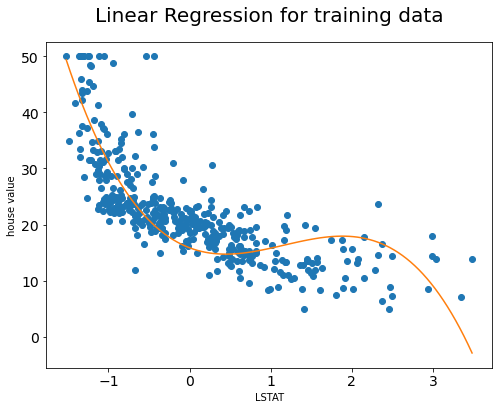

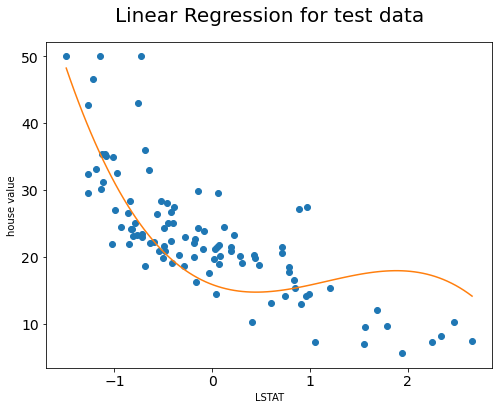

In [29]:
plot_graph(X_train_1D, Y_train,
          X_hat = X_train_for_line,
          Y_hat = tf.matmul(Phi_Xtrain_for_line, weight_gd),
          str_title = 'Linear Regression for training data')
plot_graph(X_test_1D, Y_test,
          X_hat = X_test_for_line,
          Y_hat = tf.matmul(Phi_Xtest_for_line, weight_gd),
          str_title = 'Linear Regression for test data')